# **Tarea 2 - Análisis y Adquisición de datos de PubChem**

In [19]:
# Istalación de librerias

%pip install rdkit
%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Importe de librerias necesarias

import requests
import urllib.request
import random
from rdkit import Chem
from rdkit.Chem import Draw

**The URL Path**

Most – if not all – of the information the service needs to produce its results is encoded into the URL. The general form of the URL has three parts – input, operation, and output – after the common prefix, followed by operation options as URL arguments (after the ‘?’):
https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest#section=URL-based-API


In [21]:
# https://pubchem.ncbi.nlm.nih.gov/rest/pug/<input specification>/<operation specification>/[<output specification>][?<operation_options>]

# **1.1 Identifique compuestos que contienen la palabra “benzylpiperidine” como parte de su nombre. Para realizar esta búsqueda se pueden establecer los siguientes criterios:**

In [22]:
# Compuestos con la palabra benzylpiperidine

# URL = prolog + / + input + / + operation + / + output + options

name = 'benzylpiperidine'

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'


# 🟢 Input
# <domain> = substance | compound | assay | gene | protein | pathway | taxonomy | cell | <other inputs>
# <structure search> = { substructure | superstructure | similarity | identity } / { smiles | inchi | sdf | cid}
# <fast search> = { fastidentity | fastsimilarity_2d | fastsimilarity_3d | fastsubstructure | fastsuperstructure } / { smiles | smarts | inchi | sdf | cid } | fastformula
input = f'compound/name/{name}'

# 🟡 Operation
# compound domain <operation specification> = record | <compound property> | synonyms | sids | cids | aids | assaysummary | classification | <xrefs> | description | conformers
operation = 'cids'

# 🔵 output
# <output specification> = XML | ASNT | ASNB | JSON | JSONP [ ?callback=<callback name> ] | SDF | CSV | PNG | TXT
output = 'TXT'

# 🔴 Options
options = '?name_type=word' # '' Si no se requiere nada en esoecific


# Construcción de la URL
url = f'{prolog}/{input}/{operation}/{output}{options}'
print(f'🔗 La URL es: {url}')

🔗 La URL es: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/benzylpiperidine/cids/TXT?name_type=word


In [23]:
# Número de compuestos otenidos en la busqueda

comp = requests.get(url)
comp_list = comp.text.split()
num = len(comp_list)

print(f'🧪 El número de compuestos que contienen la palabra benzylpiperidine es: {num}')

🧪 El número de compuestos que contienen la palabra benzylpiperidine es: 1542


Resultado usando el website:

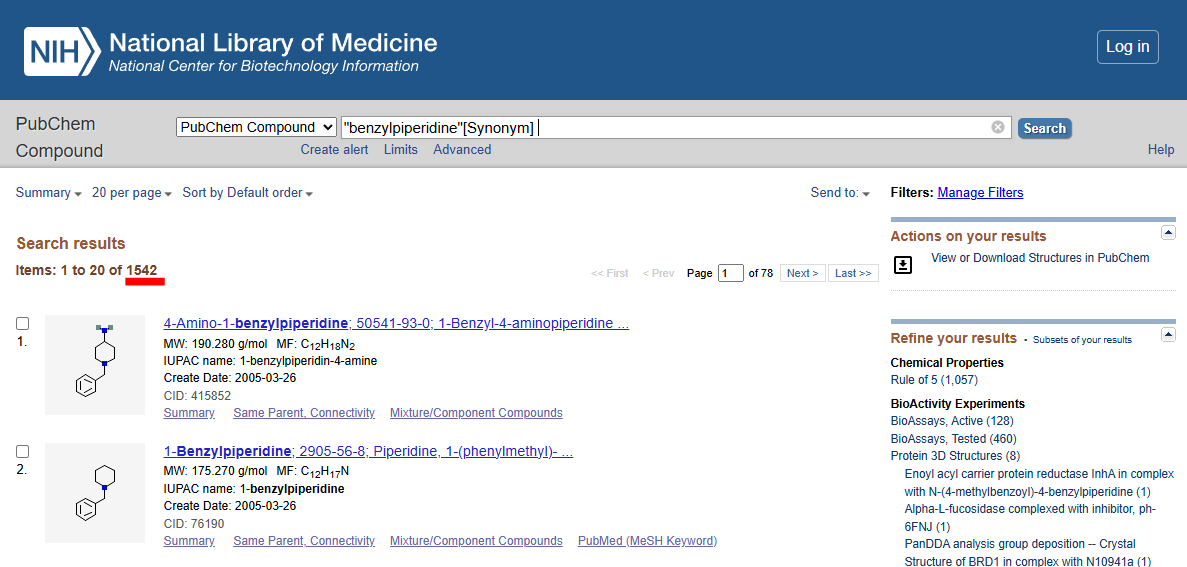

#**1.2 Obtenga un archivo csv con los ConnectivitySMILES de al menos 5 compuestos identificados en el punto anterior. Adicionalmente, puede agregar otras propiedades**
(revisar el siguiente link para seleccionar propiedades moleculares https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest#section=Compound-Property-Tables)**

In [24]:
# Selección de los 5 compuestos (aleatorios)

comp_1to5 = random.sample(comp_list, 5)
print(f'✅ La lista de los 5 compuestos es: {comp_1to5}')

✅ La lista de los 5 compuestos es: ['124074348', '53156934', '109112521', '20929449', '16884216']


In [25]:
# Creación del string con los 5 compuestos

comp_1to5_string = ','.join(comp_1to5)
print(f'🔶 El string continuo es: {comp_1to5_string}')

🔶 El string continuo es: 124074348,53156934,109112521,20929449,16884216


**Compound Property Tables**

Returns a table of compound properties. More than one property may be requested, in a comma-separated list of property tags in the request URL. Valid output formats for the property table are: XML, ASNT/B, JSON(P), CSV, and TXT (limited to a single property).

Example: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1,2,3,4,5/property/MolecularFormula,MolecularWeight,InChIKey/CSV

In [26]:
# URL = prolog + / + input + / + operation + / + options + / + output

cids = comp_1to5_string

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

# 🟢 Input
# <structure search> = { substructure | superstructure | similarity | identity } / { smiles | inchi | sdf | cid}
# compound domain <namespace> = cid | name | smiles | inchi | sdf | inchikey | formula | <structure search> | <xref> | <mass> | listkey | <fast search>
input = f'compound/cid/{cids}'

# 🟡 Operation
# <compound property> = property / [comma-separated list of property tags]
operation = 'property/SMILES,MolecularWeight,HBondDonorCount,HBondAcceptorCount,XLogP,RotatableBondCount,TPSA'

# 🔵 output
# <output specification> = XML | ASNT | ASNB | JSON | JSONP [ ?callback=<callback name> ] | SDF | CSV | PNG | TXT
output = 'CSV'

# 🔴 Options (Compound Property Tables)
'''
MolecularFormula
MolecularWeight
XLogP
TPSA
Complexity
EffectiveRotorCount3D
etc.
'''
options = '' # '' Si no se requiere nada en especifico

# Construcción de la URL
url = f'{prolog}/{input}/{operation}/{output}{options}'
print(f'🔗 La URL es: {url}')

🔗 La URL es: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/124074348,53156934,109112521,20929449,16884216/property/SMILES,MolecularWeight,HBondDonorCount,HBondAcceptorCount,XLogP,RotatableBondCount,TPSA/CSV


# **1.3 Busque compuestos con similitud mayor a 85% del siguiente SMILES: CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl**

**Similarity**

This is a special type of compound namespace input that retrieves CIDs by 2D similarity search. It requires a CID, or a SMILES, InChI, or SDF string in the URL path or POST body (InChI and SDF by POST only). Valid output formats are XML, JSON(P), and ASNT/B.

Example: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/cid/2244/cids/XML

In [27]:
# URL similarity = prolog + / + input + / + operation + / + output + options

smiles = 'CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl'

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

# 🟢 Input
# <structure search> = { substructure | superstructure | similarity | identity } / { smiles | inchi | sdf | cid}
# <fast search> = { fastidentity | fastsimilarity_2d | fastsimilarity_3d | fastsubstructure | fastsuperstructure } / { smiles | smarts | inchi | sdf | cid } | fastformula
input = f'compound/fastsimilarity_2d/smiles/{smiles}'

# 🟡 Operation
# compound domain <operation specification> = record | <compound property> | synonyms | sids | cids | aids | assaysummary | classification | <xrefs> | description | conformers
operation = 'cids'

# 🔵 output
# <output specification> = XML | ASNT | ASNB | JSON | JSONP [ ?callback=<callback name> ] | SDF | CSV | PNG | TXT
output = 'XML'

# 🔴 Options (Similarity search options)
'''
Threshold
MaxSeconds
MaxRecords
listkey
'''
options = '?Threshold=85&MaxRecords=100' # '' Si no se requiere nada en especifico

# Construcción de la URL
url = f'{prolog}/{input}/{operation}/{output}{options}'
print(f'🔗 La URL es: {url}')

🔗 La URL es: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/smiles/CC1CC2=C(C3(N1)C4=C(C=CC(=C4)Cl)NC3=O)NC5=CC(=C(C=C25)F)Cl/cids/XML?Threshold=85&MaxRecords=100


# **1.4 Realice una búsqueda de compuestos que contengan como subestructura una de las estructuras privilegiadas definida en los ejercicios de la sesión 1.**

🧪**Estructura privilegiada 3: indol**

In [28]:
# SMARTS

smarts = 'c1cccc2c1ccn2'
print(f'🔶 SMARTS del grupo indol: {smarts}\n')

smiles_indol = Chem.MolToSmiles(Chem.MolFromSmarts(smarts))
print(f'🔷 SMILES del grupo indol: {smiles_indol}\n')

🔶 SMARTS del grupo indol: c1cccc2c1ccn2

🔷 SMILES del grupo indol: c1ccc2nccc2c1



**Substructure / Superstructure**

This is a special type of compound namespace input that retrieves CIDs by substructure or superstructure search. It requires a CID, or a SMILES, InChI, or SDF string in the URL path or POST body (InChI and SDF by POST only). Valid output formats are XML, JSON(P), and ASNT/B.

Example:
https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsubstructure/smiles/C3=NC1=C(C=NC2=C1C=NC=C2)[N]3/cids/XML

In [29]:
# https://pubchem.ncbi.nlm.nih.gov/rest/pug/<input specification>/<operation specification>/[<output specification>][?<operation_options>]

smiles = smiles_indol
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'

# 🟢 Input
# <structure search> = { substructure | superstructure | similarity | identity } / { smiles | inchi | sdf | cid}
# <fast search> = { fastidentity | fastsimilarity_2d | fastsimilarity_3d | fastsubstructure | fastsuperstructure } / { smiles | smarts | inchi | sdf | cid } | fastformula
input = f'compound/fastsubstructure/smiles/{smiles}'

# 🟡 Operation
# compound domain <operation specification> = record | <compound property> | synonyms | sids | cids | aids | assaysummary | classification | <xrefs> | description | conformers
operation = 'cids'

# 🔵 output
# <output specification> = XML | ASNT | ASNB | JSON | JSONP [ ?callback=<callback name> ] | SDF | CSV | PNG | TXT
output = 'XML'

# 🔴 Options (Structure search options)
'''
MatchIsotopes
MatchCharges
MatchTautomers
RingsNotEmbedded
SingleDoubleMatchAromatic or SingleDoubleBondsMatch
ChainsMatchRings
StripHydrogen
Stereo
MaxSeconds
MaxRecords
listkey
'''
options = '' # '' Si no se requiere nada en especifico

# Construcción de la URL
url = f'{prolog}/{input}/{operation}/{output}{options}' # Se cambia el orden del output
print(f'🔗 La URL es: {url}')


🔗 La URL es: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsubstructure/smiles/c1ccc2nccc2c1/cids/XML


In [30]:
# Número de compuestos con el núcleo indol

ind = requests.get(url)
ind_list = ind.text.split()
num_indol = len(ind_list)

print(f'🧪 El número de compuestos que continen el nucleo indol son: {num_indol}')

🧪 El número de compuestos que continen el nucleo indol son: 4347144


In [31]:
# Elección aleatoria de 6 compuestos con el nucleo indol

comp_indol = random.sample(ind_list, 6)
print(f'✅ La lista de los 6 compuestos es: {comp_indol}')

✅ La lista de los 6 compuestos es: ['<CID>155051743</CID>', '<CID>1450520</CID>', '<CID>139446857</CID>', '<CID>130223126</CID>', '<CID>61856095</CID>', '<CID>172856642</CID>']


In [32]:
# Paso adicional de ajuste por output = 'XML'

comp_indol_clean = []

for i in comp_indol:
    cleaned_cid = i.replace('<CID>', '').replace('</CID>', '')
    comp_indol_clean.append(cleaned_cid)

print(f'✅ La lista de CIDs limpia es: {comp_indol_clean}')

✅ La lista de CIDs limpia es: ['155051743', '1450520', '139446857', '130223126', '61856095', '172856642']


🔶 El string continuo de los 6 compuestos es: 155051743,1450520,139446857,130223126,61856095,172856642

🔗 La URL es: https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/155051743,1450520,139446857,130223126,61856095,172856642/property/SMILES/txt

6️⃣ La lista de los 6 smiles es: ['C1=CC=C(C=C1)N2C3=CC=CC=C3C4=CC(=C(C=C42)O)N(C5=CC=CC=C5)C6=CC=CC=C6', 'COC1=CC2=NC(=C(C=C2C=C1)C#N)SCC(=O)NCCC3=CNC4=CC=CC=C43', 'CC1(CC=C(C=C1)N2CCOCC2)[C@H]3C4=C(C[C@@H](N3C(=O)CCl)COC)C5=CC=CC=C5N4', 'C1=CC=C2C(=C1)C3=C(C4=C2N(C5=CC=CC=C54)C6=CC(=CC=C6)Br)SC7=CC=CC=C73', 'CC1=CC2=CC=CC=C2N1CC(=O)NCC3=NNN=N3', 'CN1C=CC2=C1C=CC(=C2)N3C4=NC=CN(C4NC3=O)O']

🧪 Compuestos obtenidos con el grupo indol:


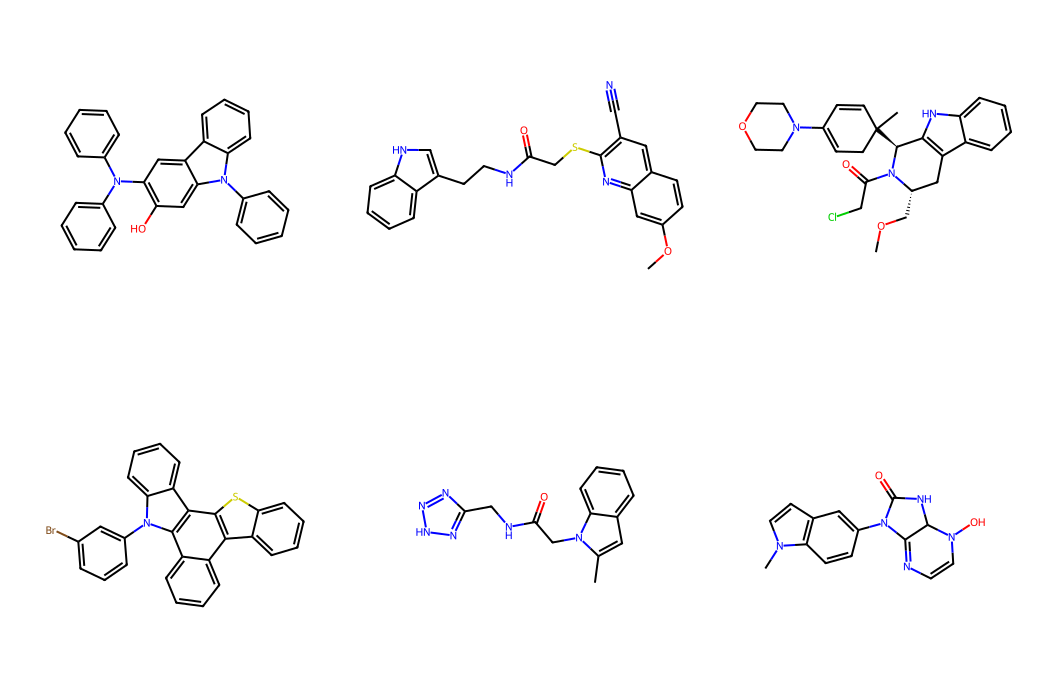

In [33]:
# Creación del string con los 6 compuestos

comp_1to6_string = ','.join(comp_indol_clean)
print(f'🔶 El string continuo de los 6 compuestos es: {comp_1to6_string}')


# URL = prolog + / + input + / + operation + / + output + options
cids = comp_1to6_string

prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
input = f"compound/cid/{cids}"
operation = "property/SMILES"
output = "txt"
options = '' # '' Si no se requiere nada en especifico

# Construcción de la URL
url = f'{prolog}/{input}/{operation}/{output}{options}' # Se cambia el orden del output
print(f'\n🔗 La URL es: {url}')

# Lista con los smiles de los 6 compuestos
ind_6 = requests.get(url)
ind_6_list = ind_6.text.split()
print(f'\n6️⃣ La lista de los 6 smiles es: {ind_6_list}')


# Visualización gráfica de los 6 compuestos
# Conversión a formato mol y creación de lista
mol_list = []
for smiles in ind_6_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)


# Visualización
img = Draw.MolsToGridImage( mol_list, subImgSize=(350,350), molsPerRow=3 )
print(f'\n🧪 Compuestos obtenidos con el grupo indol:')
img